In [324]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Workshop 5
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries 
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [325]:
data = pd.read_csv("philadelphia_2019.csv")
weatherData = pd.read_csv("weather_hourly_philadelphia.csv")

# 1.1 Quick overview

In [326]:
data.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2019-01-01 00:19:00,2019-01-01 00:27:00,3049,3007,14495,Indego30,Foglietta Plaza,"11th & Pine, Kahn Park"
1,2019-01-01 00:30:00,2019-01-01 00:37:00,3005,3007,5332,Day Pass,"Welcome Park, NPS","11th & Pine, Kahn Park"
2,2019-01-01 00:52:00,2019-01-01 01:05:00,3166,3169,14623,Indego30,Frankford & Belgrade,2nd & Race
3,2019-01-01 00:55:00,2019-01-01 01:04:00,3058,3103,11706,Indego30,20th & Fairmount,"27th & Master, Athletic Recreation Center"
4,2019-01-01 01:05:00,2019-01-01 01:17:00,3182,3028,11039,Indego30,17th & Sansom,4th & Bainbridge


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744260 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          744260 non-null  object
 1   end_time            744260 non-null  object
 2   start_station_id    744260 non-null  int64 
 3   end_station_id      744260 non-null  int64 
 4   bike_id             744260 non-null  int64 
 5   user_type           744225 non-null  object
 6   start_station_name  744260 non-null  object
 7   end_station_name    744260 non-null  object
dtypes: int64(3), object(5)
memory usage: 45.4+ MB


In [328]:
# different user types
user_types = data['user_type'].unique()
user_types

array(['Indego30', 'Day Pass', 'Indego365', 'IndegoFlex', 'Walk-up', nan],
      dtype=object)

In [329]:
# number of each user type
data['user_type'].value_counts()      

Indego30      505872
Indego365     147580
Day Pass       89137
IndegoFlex      1410
Walk-up          226
Name: user_type, dtype: int64

# 1.2 Data Preparation

## 1.2.1 Dealing with missing values

In [330]:
data.isnull().sum()

start_time             0
end_time               0
start_station_id       0
end_station_id         0
bike_id                0
user_type             35
start_station_name     0
end_station_name       0
dtype: int64

because there are only 35 out of 744260 rows with missing values, we can simply drop these rows

In [331]:
data_clean = data.dropna(axis=0, inplace=False)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744225 entries, 0 to 744259
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   start_time          744225 non-null  object
 1   end_time            744225 non-null  object
 2   start_station_id    744225 non-null  int64 
 3   end_station_id      744225 non-null  int64 
 4   bike_id             744225 non-null  int64 
 5   user_type           744225 non-null  object
 6   start_station_name  744225 non-null  object
 7   end_station_name    744225 non-null  object
dtypes: int64(3), object(5)
memory usage: 51.1+ MB


## 1.2.2 Formatting

In [332]:
data.sort_values(["bike_id","start_time"], inplace=True)
data["start_time"] = pd.to_datetime(data["start_time"])
data["end_time"] = pd.to_datetime(data["end_time"])

In [333]:
#type(data["end_time"])
type(data["start_time"])

pandas.core.series.Series

In [334]:
data.head(30)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
567069,2019-09-27 12:48:00,2019-09-27 13:04:00,3167,3078,1,Indego365,12th & Chestnut,19th & Market
567125,2019-09-27 13:05:00,2019-09-27 14:46:00,3078,3000,1,Indego365,19th & Market,Virtual Station
644780,2019-10-26 13:10:23,2019-10-26 14:10:23,3162,3000,42,Day Pass,27th & South,Virtual Station
723290,2019-12-11 14:19:12,2019-12-11 14:52:43,3042,3042,44,Indego365,3042,3042
723350,2019-12-11 15:09:05,2019-12-11 16:25:57,3042,3000,44,Indego365,3042,Virtual Station
737295,2019-12-23 19:01:59,2019-12-24 09:05:14,3161,3158,44,Indego30,30th Street Station East,Broad & Passyunk
709595,2019-11-30 11:35:37,2019-11-30 11:38:50,3010,3000,47,Indego365,15th & Spruce,Virtual Station
714212,2019-12-04 13:05:00,2019-12-04 13:16:53,3042,3042,47,Indego365,3042,3042
9497,2019-01-09 15:05:00,2019-01-09 15:08:00,3115,3075,102,Indego30,"19th & Girard, PTTI",Fairmount & Ridge
10271,2019-01-10 07:43:00,2019-01-10 07:50:00,3075,3037,102,Indego30,Fairmount & Ridge,Pennsylvania Convention Center


In [335]:
# Maps time of day and day of week to our DF

def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

def get_minute (ts):
    return ts.minute

In [336]:
# splits start/ end time further into date, weekday, hour and minute

data["Start_date"] = data["start_time"].apply(lambda ts: get_date (ts))
data["Start_weekday"]=data["start_time"].apply(lambda x: get_weekday (x))
data["Start_hour"]=data["start_time"].apply(lambda x: get_hour (x))
data["Start_minute"]=data["start_time"].apply(lambda x: get_minute (x))

data["End_date"] = data["end_time"].apply(lambda ts: get_date (ts))
data["End_weekday"]=data["end_time"].apply(lambda x: get_weekday (x))
data["End_hour"]=data["end_time"].apply(lambda x: get_hour (x))
data["End_minute"]=data["end_time"].apply(lambda x: get_minute (x))

In [337]:
data.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,Start_date,Start_weekday,Start_hour,Start_minute,End_date,End_weekday,End_hour,End_minute
567069,2019-09-27 12:48:00,2019-09-27 13:04:00,3167,3078,1,Indego365,12th & Chestnut,19th & Market,2019-09-27,4,12,48,2019-09-27,4,13,4
567125,2019-09-27 13:05:00,2019-09-27 14:46:00,3078,3000,1,Indego365,19th & Market,Virtual Station,2019-09-27,4,13,5,2019-09-27,4,14,46
644780,2019-10-26 13:10:23,2019-10-26 14:10:23,3162,3000,42,Day Pass,27th & South,Virtual Station,2019-10-26,5,13,10,2019-10-26,5,14,10
723290,2019-12-11 14:19:12,2019-12-11 14:52:43,3042,3042,44,Indego365,3042,3042,2019-12-11,2,14,19,2019-12-11,2,14,52
723350,2019-12-11 15:09:05,2019-12-11 16:25:57,3042,3000,44,Indego365,3042,Virtual Station,2019-12-11,2,15,9,2019-12-11,2,16,25


In [339]:
# adds column with verbosed weekday into DF
weekday_dict = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
data["Weekday_verbose_start"] = data["Start_weekday"].apply(lambda x: weekday_dict[x])
data["Weekday_verbose_end"] = data["End_weekday"].apply(lambda x: weekday_dict[x])

In [340]:
data.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,Start_date,Start_weekday,Start_hour,Start_minute,End_date,End_weekday,End_hour,End_minute,Weekday_verbose_start,Weekday_verbose_end
567069,2019-09-27 12:48:00,2019-09-27 13:04:00,3167,3078,1,Indego365,12th & Chestnut,19th & Market,2019-09-27,4,12,48,2019-09-27,4,13,4,Fri,Fri
567125,2019-09-27 13:05:00,2019-09-27 14:46:00,3078,3000,1,Indego365,19th & Market,Virtual Station,2019-09-27,4,13,5,2019-09-27,4,14,46,Fri,Fri
644780,2019-10-26 13:10:23,2019-10-26 14:10:23,3162,3000,42,Day Pass,27th & South,Virtual Station,2019-10-26,5,13,10,2019-10-26,5,14,10,Sat,Sat
723290,2019-12-11 14:19:12,2019-12-11 14:52:43,3042,3042,44,Indego365,3042,3042,2019-12-11,2,14,19,2019-12-11,2,14,52,Wed,Wed
723350,2019-12-11 15:09:05,2019-12-11 16:25:57,3042,3000,44,Indego365,3042,Virtual Station,2019-12-11,2,15,9,2019-12-11,2,16,25,Wed,Wed


# Fleet Size and Availability

In [341]:
fleet_size = len(data["bike_id"].unique())

print("The bike fleet from Indego consists of {} bikes (for the observed time frame)".format(fleet_size))

The bike fleet from Indego consists of 1677 bikes (for the observed time frame)


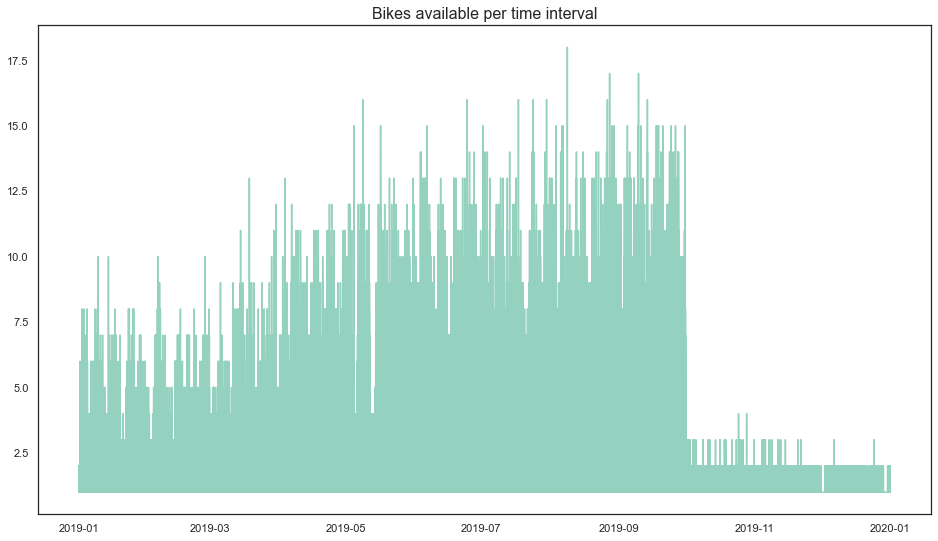

In [342]:
# Availability over time (5 min intervals)

data_avail = data.groupby("start_time")["bike_id"].nunique() # this counts unique vehicles per 5-min time interval

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(data_avail)
ax.set_title("Bikes available per time interval",fontsize=16)

plt.show()